In [55]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch.nn
from tqdm.auto import tqdm
import numpy as np
import pickle
from omegaconf import OmegaConf
from hydra.utils import instantiate
import sys

sys.path.append("..")
import os

# Prepare observations

In [56]:
from hpl.utils.l96observations import (
    simulate_l96_1level,
    simulate_l96_2levels,
    corrupt,
)
import hashlib

In [58]:
base_dir = "/home/vadim/Dev/hidden-process-learning"
data_dir = os.path.join(base_dir, "data")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# One level model

In [59]:
dt: float = 0.01
f: float = 8
k: int = 40
n_steps: int = 500
spin_up_steps: int = 500
noise_sigma: float = 1.0
part_missing: float = 0.25
seed = 112
pl.seed_everything(seed)

Global seed set to 112


112

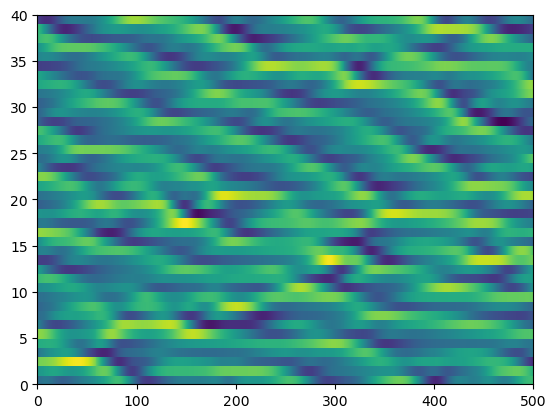

In [60]:
x_true = simulate_l96_1level(f, k, dt, n_steps, spin_up_steps, method="rk4")
x_true_preview = x_true
plt.pcolor(x_true_preview.T)

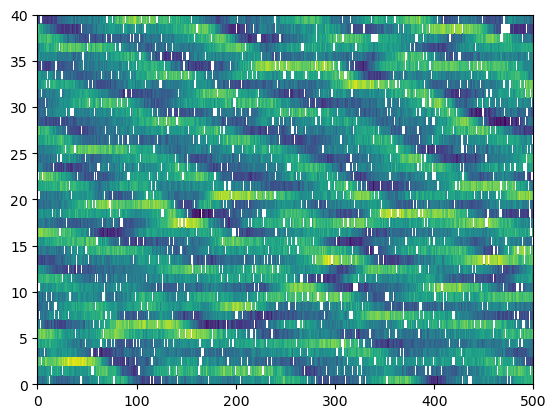

In [61]:
x_obs = corrupt(x_true, noise_sigma, part_missing)
x_obs_preview = x_obs.clone()
plt.pcolor(x_obs_preview.T)

In [62]:
data = {
    "x_true": x_true_preview,
    "x_obs": x_obs_preview,
    "meta": {
        "dt": dt,
        "f": f,
        "k": k,
        "n_steps": n_steps,
        "spin_up_steps": spin_up_steps,
        "noise_sigma": noise_sigma,
        "part_missing": part_missing,
        "seed": seed,
    },
}

In [63]:
s = str(sorted(data['meta'].items()))
hash_int = int(hashlib.sha1(s.encode("utf-8")).hexdigest(), 16) % (10 ** 8)
print(hash_int)
with open(f"{data_dir}/l96-1-{hash_int}.pkl", "wb") as file:
    pickle.dump(data, file)

65402354


# Two levels model

In [64]:
dt: float = 0.01
f: float = 10
b: float = 10
c: float = 1
h: float = 10
k: int = 36
j: int = 10
n_steps: int = 500
spin_up_steps: int = 500
noise_sigma: float = 0.5
part_missing: float = 0.25
seed = 112
pl.seed_everything(seed)

Global seed set to 112


112

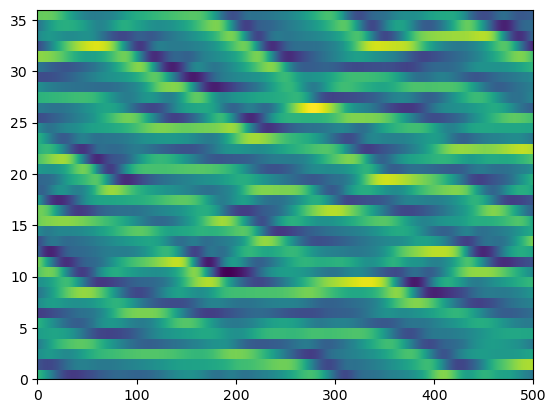

In [65]:
x_true, _ = simulate_l96_2levels(f, b, c, h, k, j, dt, n_steps, spin_up_steps, method="rk4")
x_true_preview = x_true
plt.pcolor(x_true_preview.T)

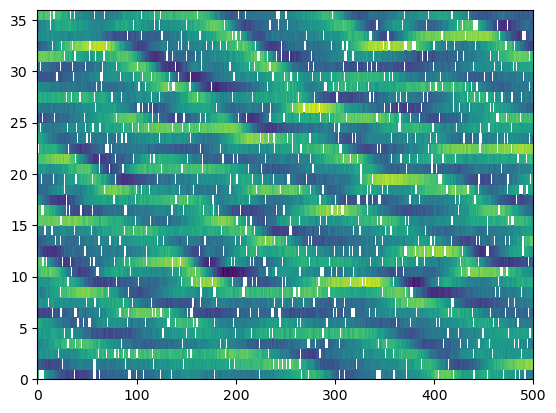

In [66]:
x_obs = corrupt(x_true, noise_sigma, part_missing)
x_obs_preview = x_obs.clone()
plt.pcolor(x_obs_preview.T)

In [67]:
data = {
    "x_true": x_true,
    "x_obs": x_obs,
    "meta": {
        "dt": dt,
        "f": f,
        "b": b,
        "c": c,
        "h": h,
        "k": k,
        "j": j,
        "n_steps": n_steps,
        "spin_up_steps": spin_up_steps,
        "noise_sigma": noise_sigma,
        "part_missing": part_missing,
        "seed": seed,
    },
}

In [68]:
s = str(sorted(data['meta'].items()))
hash_int = int(hashlib.sha1(s.encode("utf-8")).hexdigest(), 16) % (10 ** 8)
print(hash_int)
with open(f"{data_dir}/l96-2-{hash_int}.pkl", "wb") as file:
    pickle.dump(data, file)

90397920


In [37]:
# from tensorboard.backend.event_processing import event_accumulator

In [38]:
# experiments = {
#     2: {
#         "path": "/home/vadim/Dev/hidden-process-learning/outputs/outputs/2022-12-08/07-27-36/lightning_logs/version_0/events.out.tfevents.1670480863.a0en2200009.219453.0",
#         "color": "red",
#     },
#     5: {
#         "path": "/home/vadim/Dev/hidden-process-learning/outputs/outputs/2022-12-08/06-38-06/lightning_logs/version_0/events.out.tfevents.1670477905.a0en2200009.217238.0",
#         "color": "blue",
#     },
#     25: {
#         "path": "/home/vadim/Dev/hidden-process-learning/outputs/outputs/2022-12-08/04-58-04/lightning_logs/version_0/events.out.tfevents.1670471989.a0en2200009.203644.0",
#         "color": "black",
#     }
# }

In [39]:
# def get_scalar(name: str):
#     scalar = {
#         "step": [],
#         "value": [],
#     }
#     tmp = ea.Scalars(name)
#     for el in tmp:
#         scalar["step"].append(el.step)
#         scalar["value"].append(el.value)
#     return scalar
#
# for key, exp in experiments.items():
#     ea = event_accumulator.EventAccumulator(exp["path"])
#     ea.Reload()
#     exp["data_loss/train"] = get_scalar("data_loss/train")
#     exp["data_loss/valid"] = get_scalar("data_loss/valid")
#     exp["model_loss/train"] = get_scalar("model_loss/train")
#     exp["model_loss/valid"] = get_scalar("model_loss/valid")
#     exp["total_loss/train"] = get_scalar("total_loss/train")
#     exp["total_loss/valid"] = get_scalar("total_loss/valid")

In [40]:
# fig, axes = plt.subplots(3, 1, figsize=(6, 6), facecolor="w")
# for key, exp in experiments.items():
#     color = exp["color"]
#     scalar = exp["total_loss/train"]
#     axes[0].plot(scalar["step"], scalar["value"], color=color, label=str(key))
#     scalar = exp["total_loss/valid"]
#     axes[0].plot(scalar["step"], scalar["value"], color=color, ls="--")
#
#     scalar = exp["data_loss/train"]
#     axes[1].plot(scalar["step"], scalar["value"], color=color, label=str(key))
#     scalar = exp["data_loss/valid"]
#     axes[1].plot(scalar["step"], scalar["value"], color=color, ls="--")
#
#     scalar = exp["model_loss/train"]
#     axes[2].plot(scalar["step"], scalar["value"], color=color, label=str(key))
#     scalar = exp["model_loss/valid"]
#     axes[2].plot(scalar["step"], scalar["value"], color=color, ls="--")
#
# axes[0].set_ylabel("total_loss")
# axes[1].set_ylabel("data_loss")
# axes[2].set_ylabel("model_loss")
# plt.legend()
# plt.tight_layout()
# plt.savefig("losses.png", dpi=300)